In [1]:
import protstruc as ps
import matplotlib.pyplot as plt

/data/project/dohoon/miniconda3/envs/torch12/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdb_ids = ['1REX', '4EOT']
sb = ps.StructureBatch.from_pdb_id(pdb_ids)

In [3]:
orientations = sb.backbone_orientations(a1='N', a2='CA', a3='C')
translations = sb.backbone_translations(atom='CA')

orientations.shape, translations.shape

(torch.Size([2, 184, 3, 3]), torch.Size([2, 184, 3]))

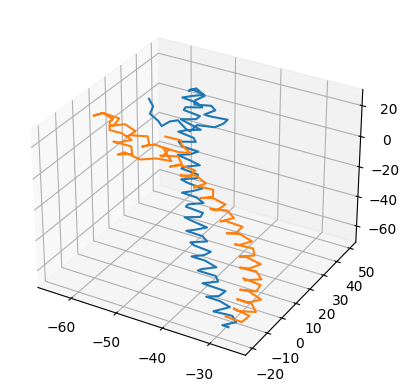

In [8]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

prt_idx = 1
chain_idx = sb.get_chain_idx()

for idx in [0, 1]:
    chain_mask = chain_idx[prt_idx] == idx
    # plot backbone CA atoms 
    ax.plot(
        translations[prt_idx, chain_mask, 0].numpy(),
        translations[prt_idx, chain_mask, 1].numpy(),
        translations[prt_idx, chain_mask, 2].numpy(),
    )